In [2]:
import numpy as np
import keras

/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras import backend as K
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_path = '/home/terminatorash2199/Desktop/flower segregated/train'
test_path = '/home/terminatorash2199/Desktop/flower segregated/test'
valid_path = '/home/terminatorash2199/Desktop/flower segregated/valid'

In [5]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224), classes=['daisy','dandelion','rose','sunflower','tulip'],batch_size=5)

Found 2500 images belonging to 5 classes.


In [22]:
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224), classes=['daisy','dandelion','rose','sunflower','tulip'],batch_size=65)

Found 823 images belonging to 5 classes.


In [7]:
valid_batch = train_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224), classes=['daisy','dandelion','rose','sunflower','tulip'],batch_size=5)

Found 1000 images belonging to 5 classes.


In [8]:
#taken from github
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [9]:
imgs,labels = next(train_batches)

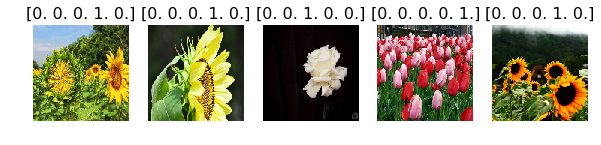

In [10]:
plots(imgs,titles=labels)

In [11]:
vgg16_model = keras.applications.vgg16.VGG16()

In [12]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [13]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [14]:
for layer in model.layers:
    layer.trainable = False

In [15]:
model.add(Dense(5,activation='softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [17]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit_generator(train_batches,steps_per_epoch=4,validation_data=valid_batch,validation_steps=10,epochs=10,verbose=2)

Epoch 1/10
 - 18s - loss: 1.2335 - acc: 0.4500 - val_loss: 0.9456 - val_acc: 0.6600
Epoch 2/10
 - 17s - loss: 1.1007 - acc: 0.5500 - val_loss: 0.9364 - val_acc: 0.6600
Epoch 3/10
 - 16s - loss: 1.2991 - acc: 0.6500 - val_loss: 1.0533 - val_acc: 0.6000
Epoch 4/10
 - 17s - loss: 1.1580 - acc: 0.6000 - val_loss: 1.2208 - val_acc: 0.5400
Epoch 5/10
 - 17s - loss: 1.2528 - acc: 0.4500 - val_loss: 0.8517 - val_acc: 0.6800
Epoch 6/10
 - 17s - loss: 0.8722 - acc: 0.6000 - val_loss: 0.9552 - val_acc: 0.6000
Epoch 7/10
 - 17s - loss: 1.2316 - acc: 0.5500 - val_loss: 1.1385 - val_acc: 0.6400
Epoch 8/10
 - 17s - loss: 0.9269 - acc: 0.6500 - val_loss: 1.3995 - val_acc: 0.5400
Epoch 9/10
 - 17s - loss: 1.0145 - acc: 0.5500 - val_loss: 0.9192 - val_acc: 0.5800
Epoch 10/10
 - 16s - loss: 1.0952 - acc: 0.6000 - val_loss: 0.7716 - val_acc: 0.6800


In [21]:
model.fit_generator(train_batches,steps_per_epoch=4,validation_data=valid_batch,validation_steps=10,epochs=10,verbose=2)

Epoch 1/10
 - 17s - loss: 0.7563 - acc: 0.7000 - val_loss: 0.7414 - val_acc: 0.7200
Epoch 2/10
 - 16s - loss: 1.0184 - acc: 0.7500 - val_loss: 0.6765 - val_acc: 0.7200
Epoch 3/10
 - 17s - loss: 0.7359 - acc: 0.6500 - val_loss: 0.9690 - val_acc: 0.5800
Epoch 4/10
 - 17s - loss: 0.7641 - acc: 0.8000 - val_loss: 1.0068 - val_acc: 0.6200
Epoch 5/10
 - 16s - loss: 0.6545 - acc: 0.7000 - val_loss: 0.6264 - val_acc: 0.7800
Epoch 6/10
 - 16s - loss: 1.4583 - acc: 0.5500 - val_loss: 0.7215 - val_acc: 0.7200
Epoch 7/10
 - 16s - loss: 0.8864 - acc: 0.6000 - val_loss: 0.9264 - val_acc: 0.6400
Epoch 8/10
 - 17s - loss: 0.6763 - acc: 0.7000 - val_loss: 1.1955 - val_acc: 0.6200
Epoch 9/10
 - 17s - loss: 0.4238 - acc: 0.8500 - val_loss: 0.8177 - val_acc: 0.5800
Epoch 10/10
 - 17s - loss: 0.6034 - acc: 0.8000 - val_loss: 0.6510 - val_acc: 0.7200


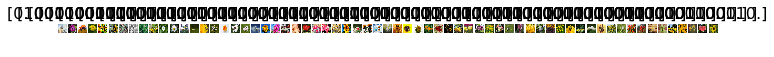

In [23]:
test_imgs , test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [24]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [25]:
predictions = model.predict_generator(test_batches,steps=1,verbose=0)

In [26]:
cm = confusion_matrix(test_labels,np.round(predictions[:,0]))

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[51  2]
 [ 3  9]]


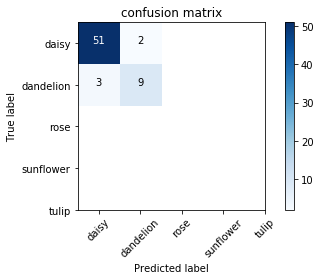

In [28]:
cm_plot_labels = ['daisy','dandelion','rose','sunflower','tulip']
plot_confusion_matrix(cm,cm_plot_labels,title='confusion matrix')
